### Training and classification of numerical digit images

Let's train a model and classify the images generated from the previous notebook using [fastai v2](https://github.com/fastai/fastai2)! Note, that the content here is basically taken from the notebook of [fastai lesson 1](https://github.com/fastai/fastai2/blob/master/nbs/course/lesson1-pets.ipynb) and an additional notebook containing a [vision tutorial](https://github.com/fastai/fastai2/blob/master/nbs/23_tutorial.vision.ipynb).

#### Important imports and checks

We need the vision part of `fastai v2`(see link above). It's imported here as `fv`, so pressing tab after typing `fv` shows the content of the library. The line `%matplotlib inline` is needed to print images inside this notebook. The cells following the imports print some version information and check the CPU.

In [1]:
%matplotlib inline
import fastai2.vision.all as fv

In [4]:
print("pytorch version: ", fv.torch.__version__)
print("   cuda version: ", fv.torch.version.cuda)
print("default compute: ", fv.default_device())

pytorch version:  1.4.0
   cuda version:  10.1
default compute:  cuda:0


In [5]:
# https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu
# setting device on GPU if available, else CPU
device = fv.torch.device('cuda' if fv.torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(fv.torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(fv.torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(fv.torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

GeForce GTX 1080 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [6]:
fv.default_device = fv.torch.device("cuda", 0)
#fv.default_device = fv.torch.device("cpu)
print(fv.default_device)

cuda:0


> Note: I no GPU is available on your system. Skip the CUDA related cell and change the commented/uncommented lines above to use CPU.

#### Setting up the data

The fastai library offers some predefined data types that make 

In [7]:
blocks=(fv.ImageBlock, fv.CategoryBlock)

In [11]:
type(fv.ImageBlock())

fastai2.data.block.TransformBlock

In [6]:
digits = fv.DataBlock(
    blocks=blocks,
    get_items=fv.get_image_files, 
    splitter=fv.RandomSplitter(),
    get_y=fv.using_attr(
        fv.RegexLabeller(r'^(\d)_\w+.jpeg$'),
        'name'
    ),
    #item_tfms=Resize(460),
    batch_tfms=fv.aug_transforms(size=224, do_flip=False)
)

In [7]:
dls = digits.dataloaders(
    "00_classifier_images",
    bs=128,
    num_workers=0
)

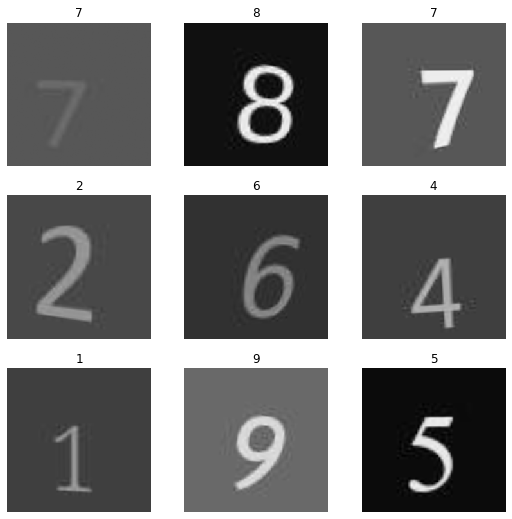

In [8]:
dls.show_batch(max_n=9)

> Note: For the following to run you might have to update the pip packages `ipython` and `ipywidgets`.

In [9]:
learn = fv.cnn_learner(dls, fv.resnet18, metrics=fv.accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/j/.cache/torch/checkpoints/resnet18-5c106cde.pth


(0.04365158379077912, 0.0014454397605732083)

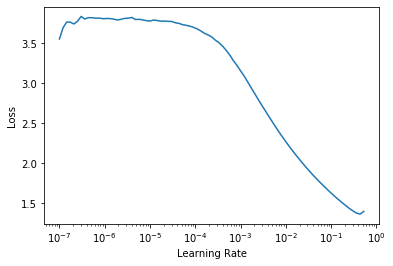

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(20, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.830749,3.727301,0.135135,00:00
1,3.728649,3.277433,0.135135,00:00
2,3.640199,2.648012,0.162162,00:00
3,3.354307,2.075671,0.378378,00:00
4,3.008497,1.717296,0.486486,00:00
5,2.683164,1.634223,0.486486,00:00
6,2.393208,1.496347,0.513514,00:00
7,2.134745,1.385818,0.567568,00:00
8,1.925571,1.292583,0.648649,00:00
9,1.742123,1.198478,0.648649,00:00


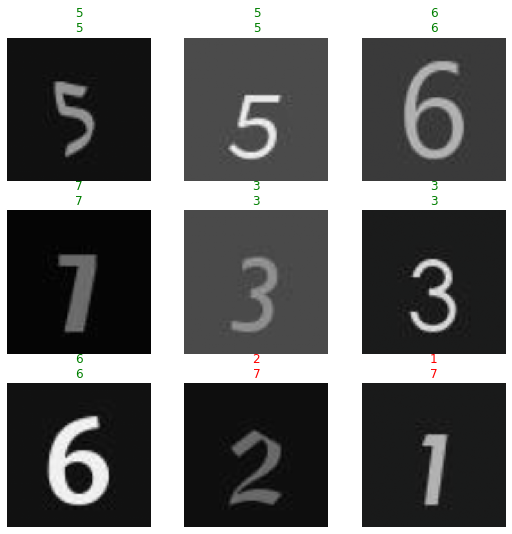

In [13]:
learn.show_results()

In [17]:
interp = fv.Interpretation.from_learner(learn)

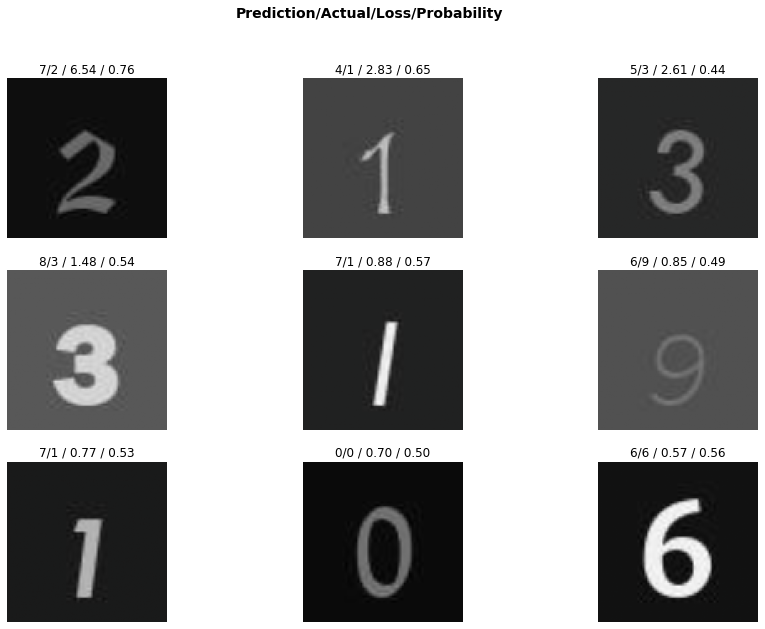

In [18]:
interp.plot_top_losses(9, figsize=(15,10))

End of notebook `01_image_classification.ipyn`